# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [184]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
import matplotlib.pyplot as plt

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [174]:
a = np.full((5,3), 'x')
df = pd.DataFrame(a)
print(df)

   0  1  2
0  x  x  x
1  x  x  x
2  x  x  x
3  x  x  x
4  x  x  x


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

default column and row labels are increasing integers that start from 0


**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [175]:
df_new = pd.DataFrame(a, index = ['Houston', 'San Diego', 'New York', 'LA', 'Chicago'], columns = ['January', 'February', 'March'])
print(df_new)


          January February March
Houston         x        x     x
San Diego       x        x     x
New York        x        x     x
LA              x        x     x
Chicago         x        x     x


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

**answer:** sb.get_dataset_names() to return a list of all the datasets that are built in \
sb.load_dataset() to load a dataset, pass in the name of the dataset as arg



In [176]:
print(sb.get_dataset_names())
flights = sb.load_dataset('flights')
print(flights.head())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [177]:
df_homes = pd.read_csv('pandasdataset.csv')
df_homes.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,121618.117906,121832.083163,122097.431586,122666.551870,123321.541083,...,351518.721971,352307.611057,353841.834013,355689.143658,357116.078246,357675.012344,357822.347127,358064.560426,358513.017685,359098.757006
1,394913,1,"New York, NY",msa,NY,216209.133034,217127.899860,218055.176122,219934.196642,221879.987460,...,636222.199812,640261.759998,645659.925232,651762.255593,656416.260742,659493.785408,662237.503625,665976.304121,669998.634470,673519.052950
2,753899,2,"Los Angeles, CA",msa,CA,220054.246992,220873.127993,221963.869677,224134.079222,226507.608099,...,918152.699842,915212.200707,914100.045351,917555.375306,923429.357719,927370.843139,931734.333222,936905.038981,943310.514820,948517.694617
3,394463,3,"Chicago, IL",msa,IL,152313.404618,152454.402460,152722.935334,153390.978391,154194.553834,...,309242.532032,310621.674151,313019.037704,315872.731458,317979.880350,319195.707171,319927.287910,320843.743524,321841.084746,322812.993795
4,394514,4,"Dallas, TX",msa,TX,124931.823275,124987.468346,125051.438051,125217.560655,125436.588761,...,368653.283687,369131.167377,370278.543600,371238.456044,371380.958812,370722.650770,369792.633169,369147.346536,368951.387387,368846.512185


**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [178]:
df_homes.to_csv('zillow_home_data.csv', index=False)

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [179]:
df_homes_2 = pd.read_csv('zillow_home_data.csv')

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [180]:
print(df_homes.shape)
print(df_homes_2.shape)


(895, 303)
(895, 303)


**answer:** the index column (the one that starts from zero at the left) is saved by default unless we put index=False, if that is done then the dimensions of both the dataframes will be the same but if index=True(default) then there will be an extra column added when we save df_homes_2

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [181]:
feb = pd.read_excel('AnalyticsSnapshot.xlsx', sheet_name=1)

ValueError: Worksheet index 1 is invalid, 1 worksheets found

**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [ ]:
feb['Percentage Increase'] = 0
feb['Percentage Increase'] = feb['Percentage Increase'].astype(str)
for i in range(len(feb)):
    this = feb.loc[i, 'This Month']
    last = feb.loc[i, 'Last Month']
    inc = ((this - last) / last)*100
    feb.loc[i, 'Percentage Increase'] = str(inc.round(2)) + str("%") 
feb.head()

,Unnamed: 0,This Month,Last Month,Month to Month Increase,Percentage Increase
0,Users,1800,280,5.428571,542.86%
1,New Users,1700,298,4.704698,470.47%
2,Page Views,2534,436,4.811927,481.19%


## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [ ]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [ ]:
rows, cols = df_penguins.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 344, Columns: 7


**13.** How might you show the first few rows of df_penguins?

In [ ]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [ ]:
species = df_penguins['species'].unique()
print("Unique Species: ", species)

Unique Species:  ['Adelie' 'Chinstrap' 'Gentoo']


**15.** What function can we use to drop the rows that have missing data?

In [ ]:
df_penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**16.** By default, will this modify df_penguins or will it return a copy?

**answer:** by default, it returns a copy of the original dataframe


**17.** How can we override the default?

**answer** to override the default, we can use the Inplace = True argument in the .dropna() method, this will replace the original df

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [ ]:
df_penguins_full = df_penguins.dropna()

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [ ]:
df_penguins_full['bill_length_mm'].mean().round(3)

43.993

**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

**answer:** kinda had to GPT this, already knew the pearson correlation coefficient and what it is but didnt know how to use the correlation matrix, so i then gpted and saw that there is a .corr() method that uses pearson to find correlation coeffs. \
then i got to know that a correlation matrix can be made, since we wanted correlation with a specific column, i took that column out of the matrix, and then also deleted the row corresponding to correlation with itself cos that will always be 1.\
from the remaining rows in that column, i just had to see which had max correlation and that turned out to be the flipper length.

In [ ]:
df_relevant = df_penguins_full[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

#in general correlation matrix
corr_matrix = df_relevant.corr()

#since we want to find only correlation with bill length,
corr_matrix = corr_matrix['bill_length_mm']
corr_matrix = corr_matrix[corr_matrix<1] #since we are removing the bill length col itself, we could also do .drop()

most_corr_col = corr_matrix.idxmax()
print("Most correlated column with bill length column is: ", most_corr_col)

Most correlated column with bill length column is:  flipper_length_mm


**21.** How could you show the median flipper length, grouped by species?

In [ ]:
grouped = df_penguins_full.groupby('species')
grouped['flipper_length_mm'].median()

species
Adelie       190.0
Chinstrap    196.0
Gentoo       216.0
Name: flipper_length_mm, dtype: float64

**22.** Which species has the longest flippers?

In [ ]:
x = grouped['flipper_length_mm'].median()
x.idxmax()

'Gentoo'

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

**answer:** again used some GPT help, but figured out that once i had the df grouped by species and mean weight, we essentially got a series in which we had to identify which difference is the smallest after taking the pairwise difference of all entities. this could be easy in this case since theres only 3 things but for a more general solution we can create a difference matrix. \
apply the function that takes the difference and store it in the matrix, notice the diagonal of the matrix will be zero since its taking difference of the same species within itself. \
to get rid of the zeros, use .mask() method and float('inf') to not get errors with checking for the condition diff == 0 \
now stack the matrix back into 1d and do idxmin to find the two most similar columns.

In [ ]:
grouped = df_penguins_full.groupby('species')['body_mass_g'].mean()
diff_matrix = grouped.apply(lambda x: abs(grouped-x).round(3))
diff_matrix = diff_matrix.mask(diff_matrix == 0, float('inf'))
print(diff_matrix)
print("Most similar species based on mean weight: ")
print(diff_matrix.stack().idxmin())

species      Adelie  Chinstrap    Gentoo
species                                 
Adelie          inf     26.924  1386.273
Chinstrap    26.924        inf  1359.349
Gentoo     1386.273   1359.349       inf
Most similar species based on mean weight: 
('Adelie', 'Chinstrap')


**24.** How could you sort the rows by bill length?

In [ ]:
df_penguins_full.sort_values(by = 'bill_length_mm', ascending=True, inplace=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female


**25.** How could you run the same sort in descending order?

In [ ]:
df_penguins_full.sort_values(by = 'bill_length_mm', ascending=False, inplace=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


**26.** How could you sort by species first, then by body mass?

In [ ]:
df_penguins_full.sort_values(by = ['species','body_mass_g'], axis=0, ascending=[True,True])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
...,...,...,...,...,...,...,...
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [ ]:
diamonds = sb.load_dataset('diamonds')

**28.** Display the columns that are available.

In [ ]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

**answer:** the type of the column can be determined by column.type() method

**30.** Select the 'table' column and show its type

In [ ]:
table = diamonds['table']
type(table)

pandas.core.series.Series

**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [ ]:
subset = diamonds.loc[:10, ['price', 'carat']]
print(subset)

    price  carat
0     326   0.23
1     326   0.21
2     327   0.23
3     334   0.29
4     335   0.31
5     336   0.24
6     336   0.24
7     337   0.26
8     337   0.22
9     338   0.23
10    339   0.30


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [ ]:
#use the .dtype attribute.
print(diamonds['cut'].dtype)

category


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [ ]:
row = diamonds.loc[0]

**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [ ]:
print(row.dtype)

object


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [ ]:
print(row.index)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**36.** Select the row with the highest priced diamond.

In [ ]:
diamonds.loc[diamonds['price'].idxmax()]

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table         60.0
price        18823
x              8.5
y             8.47
z             5.16
Name: 27749, dtype: object

**37.** Select the row with the lowest priced diamond.

In [ ]:
diamonds.loc[diamonds['price'].idxmin()]

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [ ]:
taxis = sb.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [ ]:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'])

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [ ]:
x = taxis.loc[(taxis['pickup_time'] >= '2019-03-23 00:06:00') & (taxis['pickup_time'] <= '2019-03-24 00:00:00')]
print(x)

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [ ]:
taxis.set_index('pickup_time', inplace=True)

df_means = taxis.resample('H').mean()
print(df_means)

**42.** Create a simple line plot of the value "distance".  

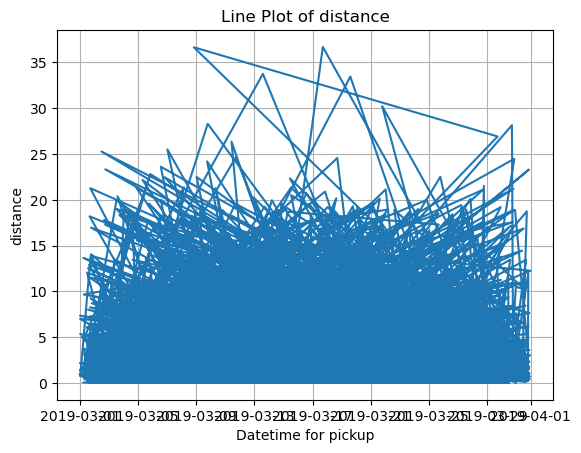

In [191]:
plt.plot(taxis['pickup'], taxis['distance'])
plt.title('Line Plot of distance')
plt.xlabel('Datetime for pickup')
plt.ylabel('distance')
plt.grid(True)
plt.show()

**43.** Overall, do riders travel further or less far as the day progresses?

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [193]:
taxis['tip_in_percent'] = ((taxis['tip']/taxis['fare'])*100).round(2)
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_in_percent
pickup_time,,,,,,,,,,,,,,,
2019-03-23 20:21:09,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,30.71
2019-03-04 16:11:55,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.00
2019-03-27 17:53:01,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,31.47
2019-03-10 01:23:59,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,22.78
2019-03-30 13:27:42,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,12.22


**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [196]:
taxis['time_interval'] = range(0, len(taxis))
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_in_percent,time_interval
pickup_time,,,,,,,,,,,,,,,,
2019-03-23 20:21:09,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,30.71,0
2019-03-04 16:11:55,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.00,1
2019-03-27 17:53:01,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,31.47,2
2019-03-10 01:23:59,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,22.78,3
2019-03-30 13:27:42,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,12.22,4


Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [199]:
print(taxis['tip_in_percent'].corr(taxis['distance']))
print(taxis['tip_in_percent'].corr(taxis['passengers']))
print(taxis['tip_in_percent'].corr(taxis['time_interval']))

-0.1277468372497605
0.02991085045212104
-0.15977459947561617


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

**answer:** strongest correlation is shown by the pair of tip and passenger columns

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

correlation between tips and time interval is negative, so no, people tip less as the day goes on.